In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(4)

means = [[-1, 1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

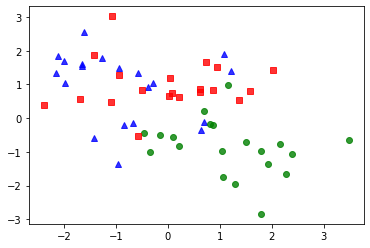

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize=6, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize=6, alpha=.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize=6, alpha=.8)
    
kmeans_display(X, original_label)
plt.show()

In [5]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis=0, keepdims=True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# One-hot coding
from scipy import sparse
def convert_labels(y, C=3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat, W1, W2, lam):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] + lam*(np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)

In [29]:
lam = 0.001 # regularization parameter
"""
Khi lam=0 tức là khong có regularization, training set phân lớp đúng và bị phân thành nhiều mảnh -> không tự nhiên
Khi lam=0.001, các mảnh trông tự nhiên hơn, nhưng lớp green vẫn có mảnh nhỏ: Overfitting
Khi lam=1, tức ta xem phần regularization quan trọng hơn loss, thì các phần tử w tiến về 0 để thỏa mãn regularization nhỏ: Underfitting
"""
d0 = 2
d1 = h =100
d2 = C = 3
y = original_label.T
X = X.T

W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1
for i in range(10000):
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    
    if i%1000 == 0:
        loss = cost(Y, Yhat, W1, W2, lam)
        print('iter %d, loss: %f' %(i, loss))
    
    # backpropagation
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T) + lam*W2
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0
    dW1 = np.dot(X, E1.T) + lam*W1
    db1 = np.sum(E1, axis=1, keepdims=True)
    
    #Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098403
iter 1000, loss: 0.526777
iter 2000, loss: 0.525002
iter 3000, loss: 0.553465
iter 4000, loss: 0.521026
iter 5000, loss: 0.517388
iter 6000, loss: 0.526849
iter 7000, loss: 0.511180
iter 8000, loss: 0.516817
iter 9000, loss: 0.517363


In [30]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = (100*np.mean(predicted_class==y))

print('Training accuracy: %.2f %%' %acc)

Training accuracy: 93.33 %


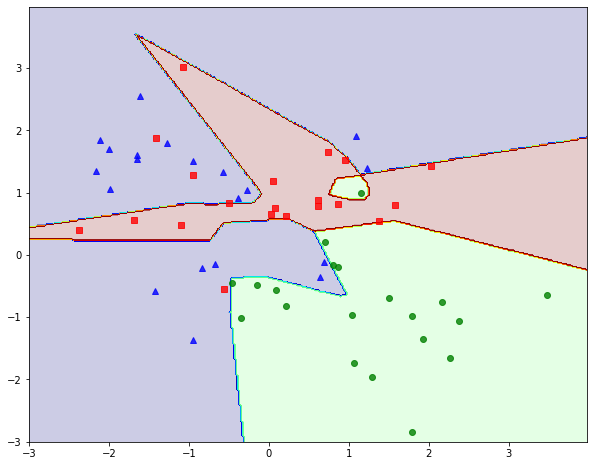

In [32]:
xm = np.arange(-3, 4, 0.02)
ym = np.arange(-3, 4, 0.02)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1))

Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
Z = np.argmax(Z2, axis=0)

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.2)
kmeans_display(X.T, original_label.T)
plt.show()